#참조 : https://www.kaggle.com/roshansharma/market-basket-analysis/notebook

In [1]:
# Apriori 알고리즘 이용 

In [2]:
# 상점에서 다른 물건을 구매하는 서로 다른 고객의 7500개의 
# 정보가 있는 데이터 셋을 가지고 있다 서로 다른 물건 간의 상관 관계를 찾아야한다

In [3]:
# Apriori는 연관 규칙 학습에서 응용 프로그램으로 빈번한 항목 집합을 추출하는 데 널리 사용되는 알고리즘입니다.
# apriori 알고리즘은 상점 고객의 구매와 같은 트랜잭션이 포함 된 데이터베이스에서 작동하도록 설계되었습니다. 
# 항목 세트는 사용자가 지정한 지원 임계 값을 충족하는 경우 "빈번 함"으로 간주됩니다.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')

import os
print(os.listdir('../Market/'))

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

['.ipynb_checkpoints', 'Market_Basket_Optimisation.csv', 'Untitled.ipynb']


ModuleNotFoundError: No module named 'mlxtend'

In [7]:
data = pd.read_csv('../Market/Market_Basket_Optimisation.csv', header = None)

data.shape

(7501, 20)

In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [10]:
data.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
3268,shrimp,frozen vegetables,spaghetti,bug spray,champagne,frozen smoothie,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6704,shrimp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3528,turkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4691,bug spray,hot dogs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5337,frozen smoothie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3904,frozen vegetables,mineral water,pancakes,cake,cooking oil,green tea,shampoo,tomato juice,magazines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3323,frozen vegetables,ground beef,spaghetti,chocolate,french fries,escalope,pancakes,tomato juice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2121,mineral water,tea,escalope,fresh bread,magazines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3992,hot dogs,shampoo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1586,olive oil,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,sparkling water,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [ ]:
# 시각화

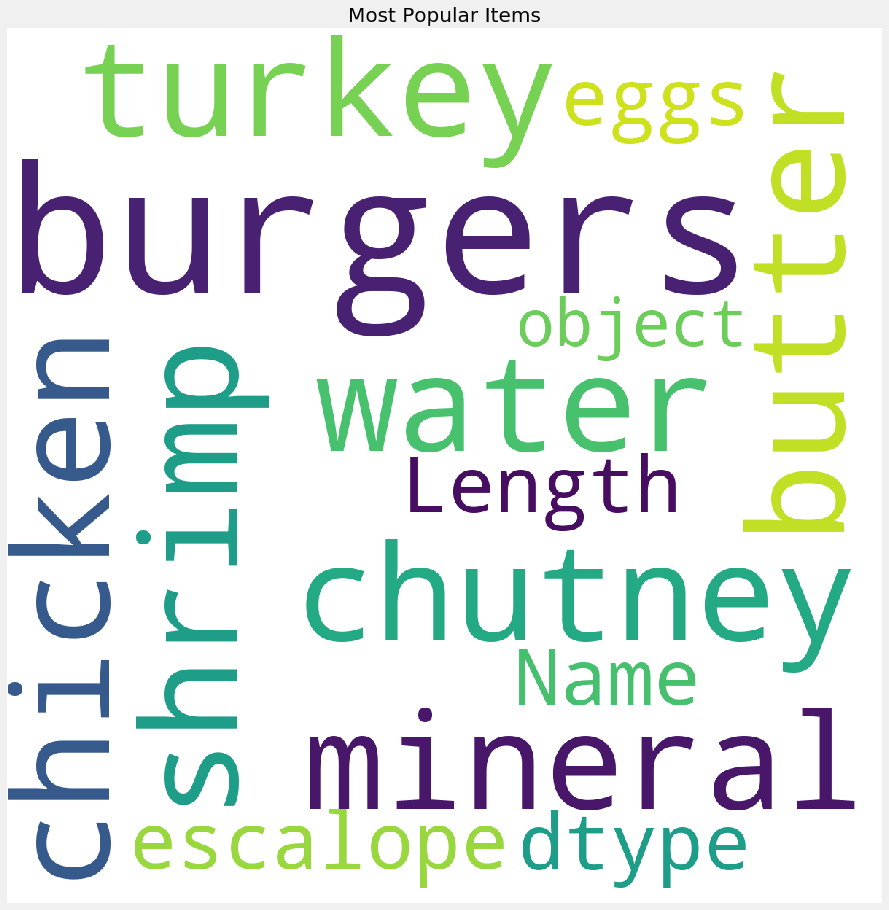

In [15]:
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15,15)
wordcloud = WordCloud(background_color='white', width = 1200, height= 1200,
                     max_words = 121).generate(str(data[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items', fontsize = 20)
plt.show()

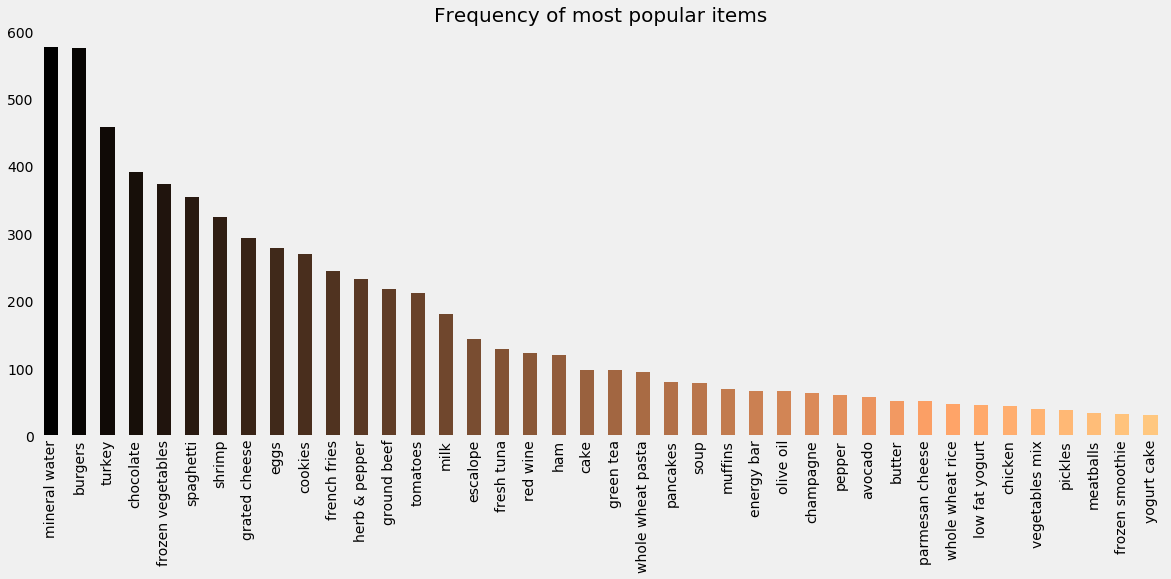

In [16]:
# 가장 인기있는 상품 빈도

plt.rcParams['figure.figsize'] = (18,7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color)
plt.title('Frequency of most popular items', fontsize=20)
plt.xticks(rotation= 90)
plt.grid()
plt.show()

In [18]:
y = data[0].value_counts().head(50).to_frame()
y.index

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',
       'olive oil', 'champagne', 'pepper', 'avocado', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake', 'salmon', 'dessert wine', 'hot dogs', 'honey',
       'candy bars', 'cereals', 'oil', 'strawberries', 'tomato sauce', 'yams'],
      dtype='object')

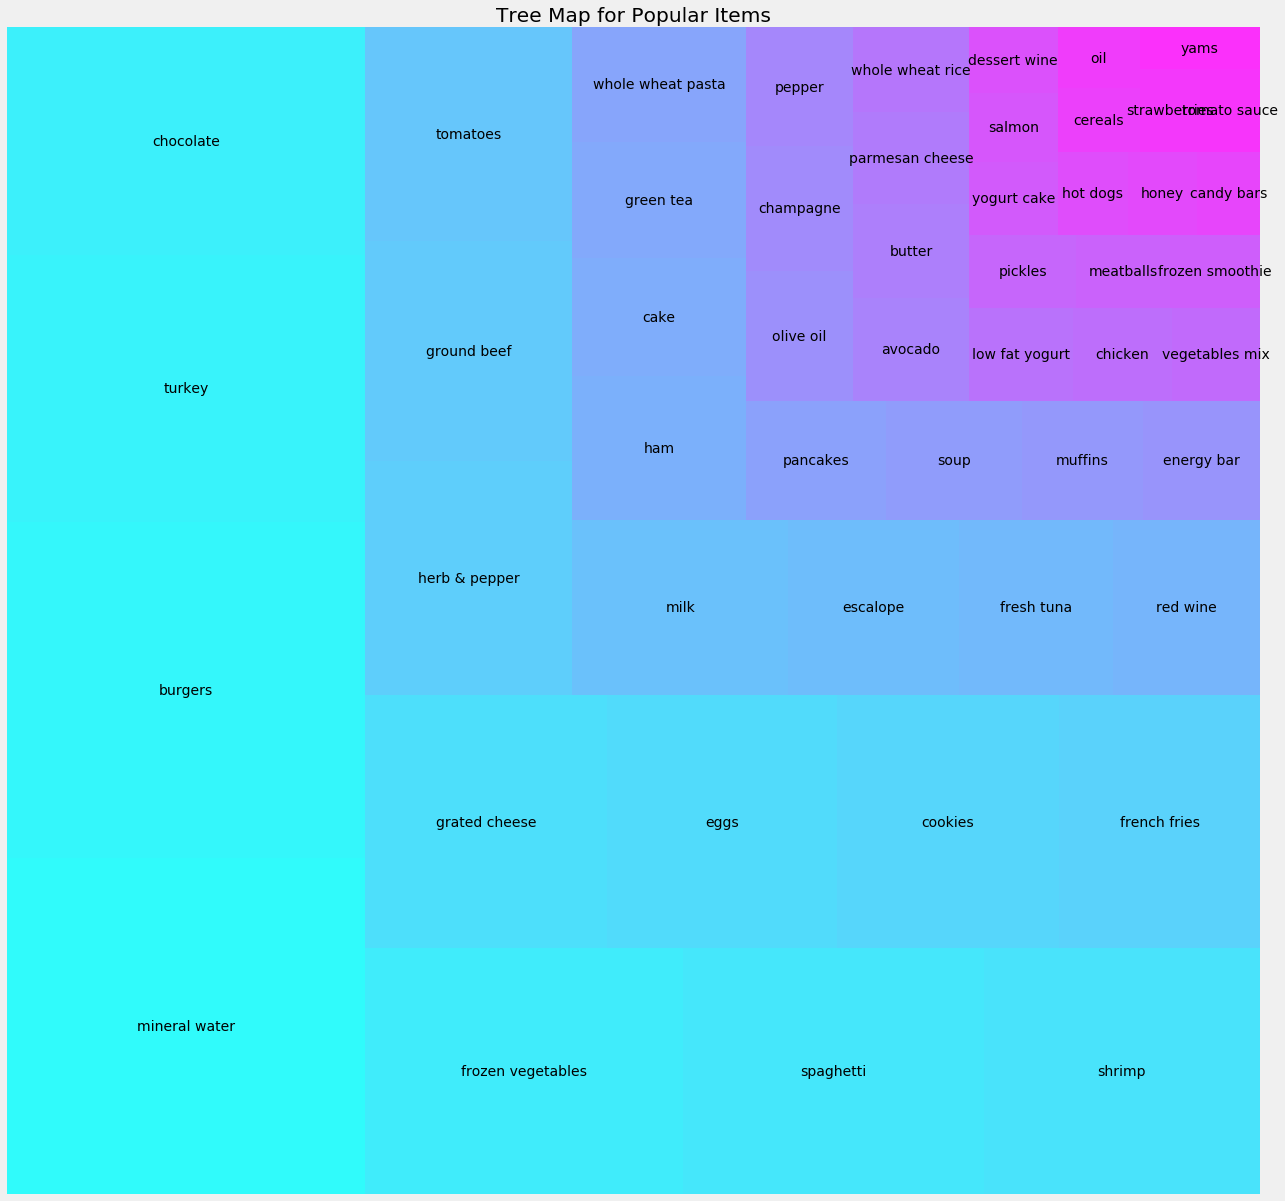

In [19]:
# tree map

plt.rcParams['figure.figsize'] = (20,20)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color= color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

In [22]:
data['food']= 'Food'
food = data.truncate(before = -1, after = 15)

import networkx as nx

food = nx.from_pandas_edgelist(food, source =  'food', target = 0, edge_attr = True)

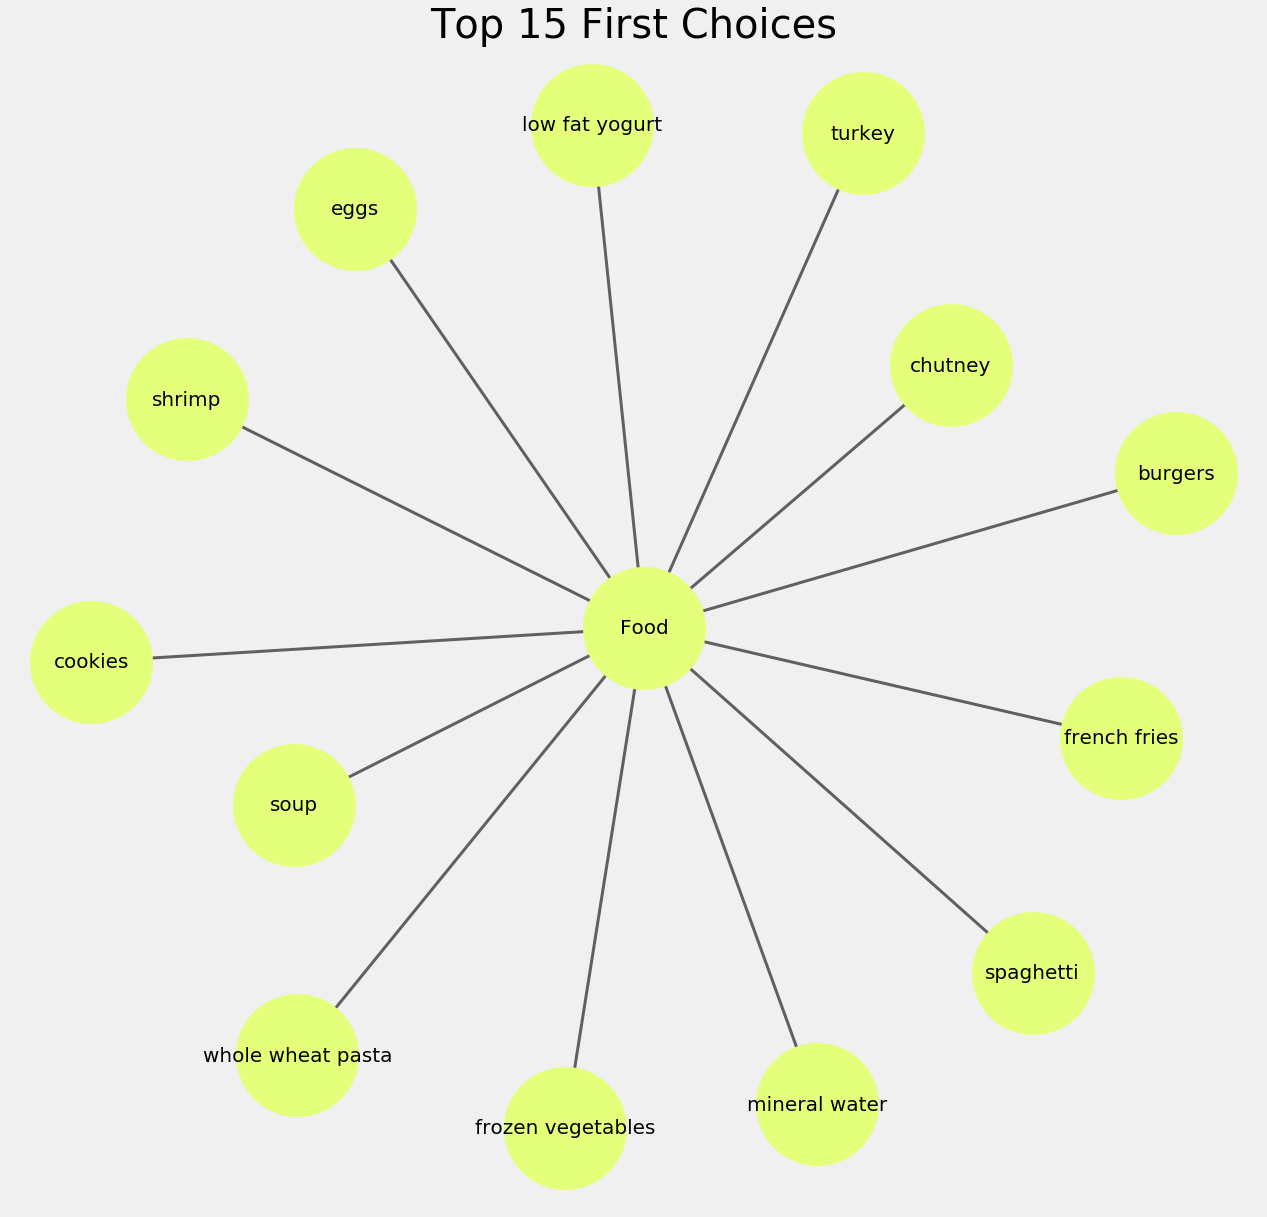

In [25]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(food)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize= 40)
plt.show()

In [29]:
data['secondchoice'] = 'Second Choice'
secondchoice = data.truncate(before = -1, after= 15)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 1,
                                      edge_attr = True)

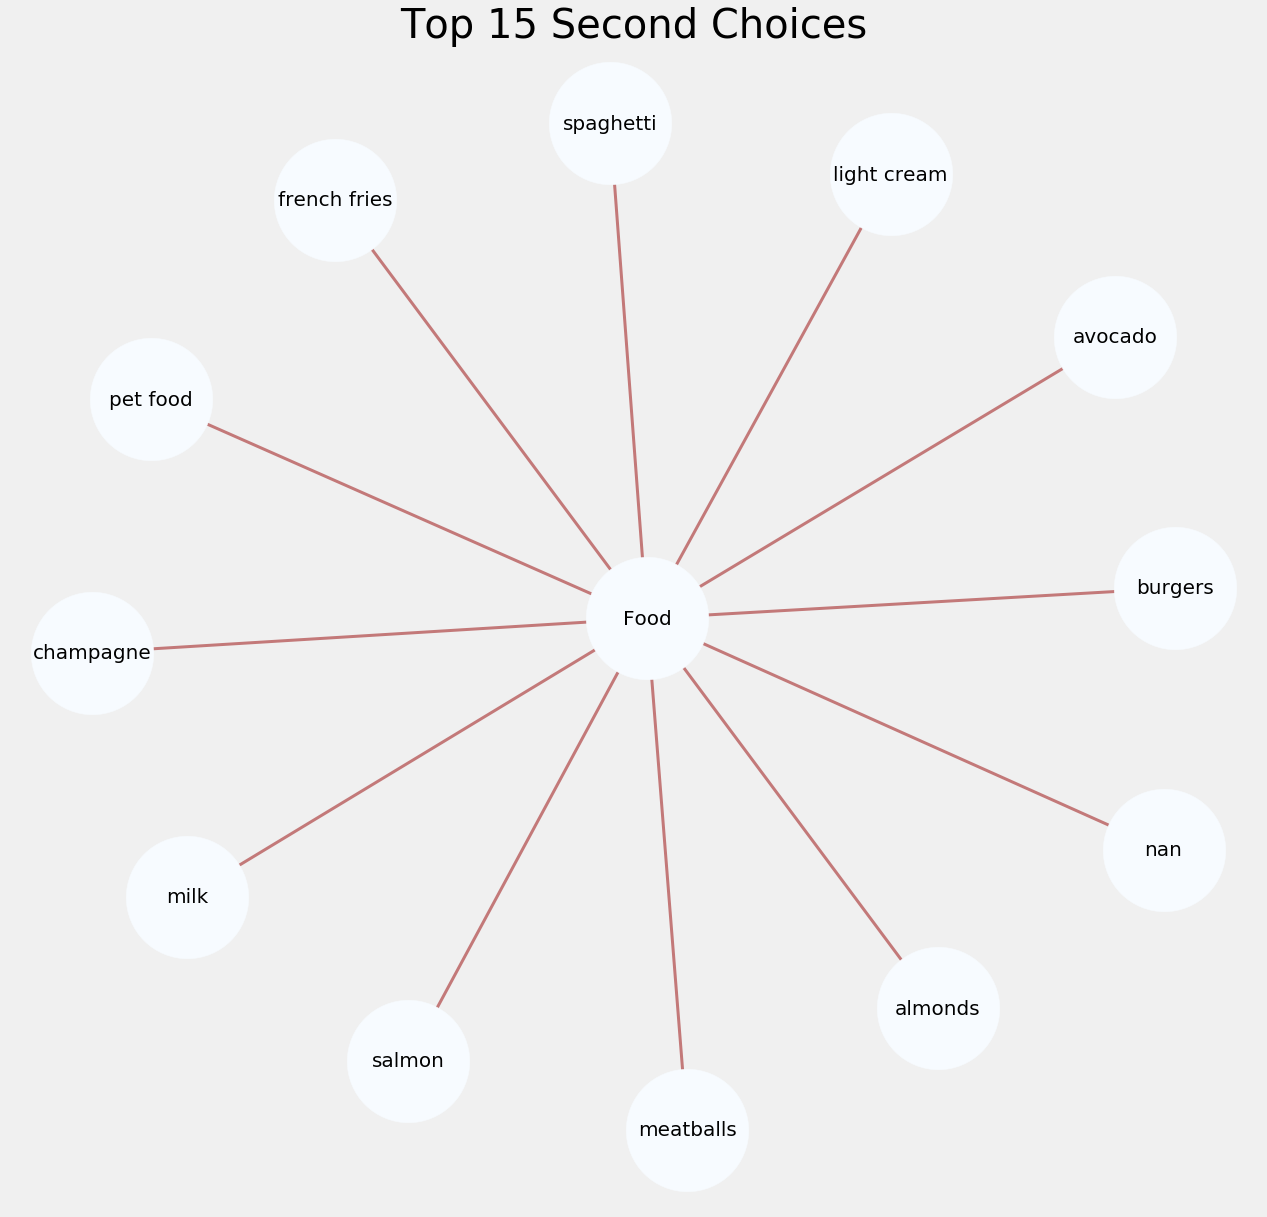

In [30]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Blues(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'brown')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Second Choices', fontsize = 40)
plt.show()

In [31]:
data['thirdchoice'] = 'Third Choice'
secondchoice = data.truncate(before = -1, after = 10)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 2, edge_attr = True)

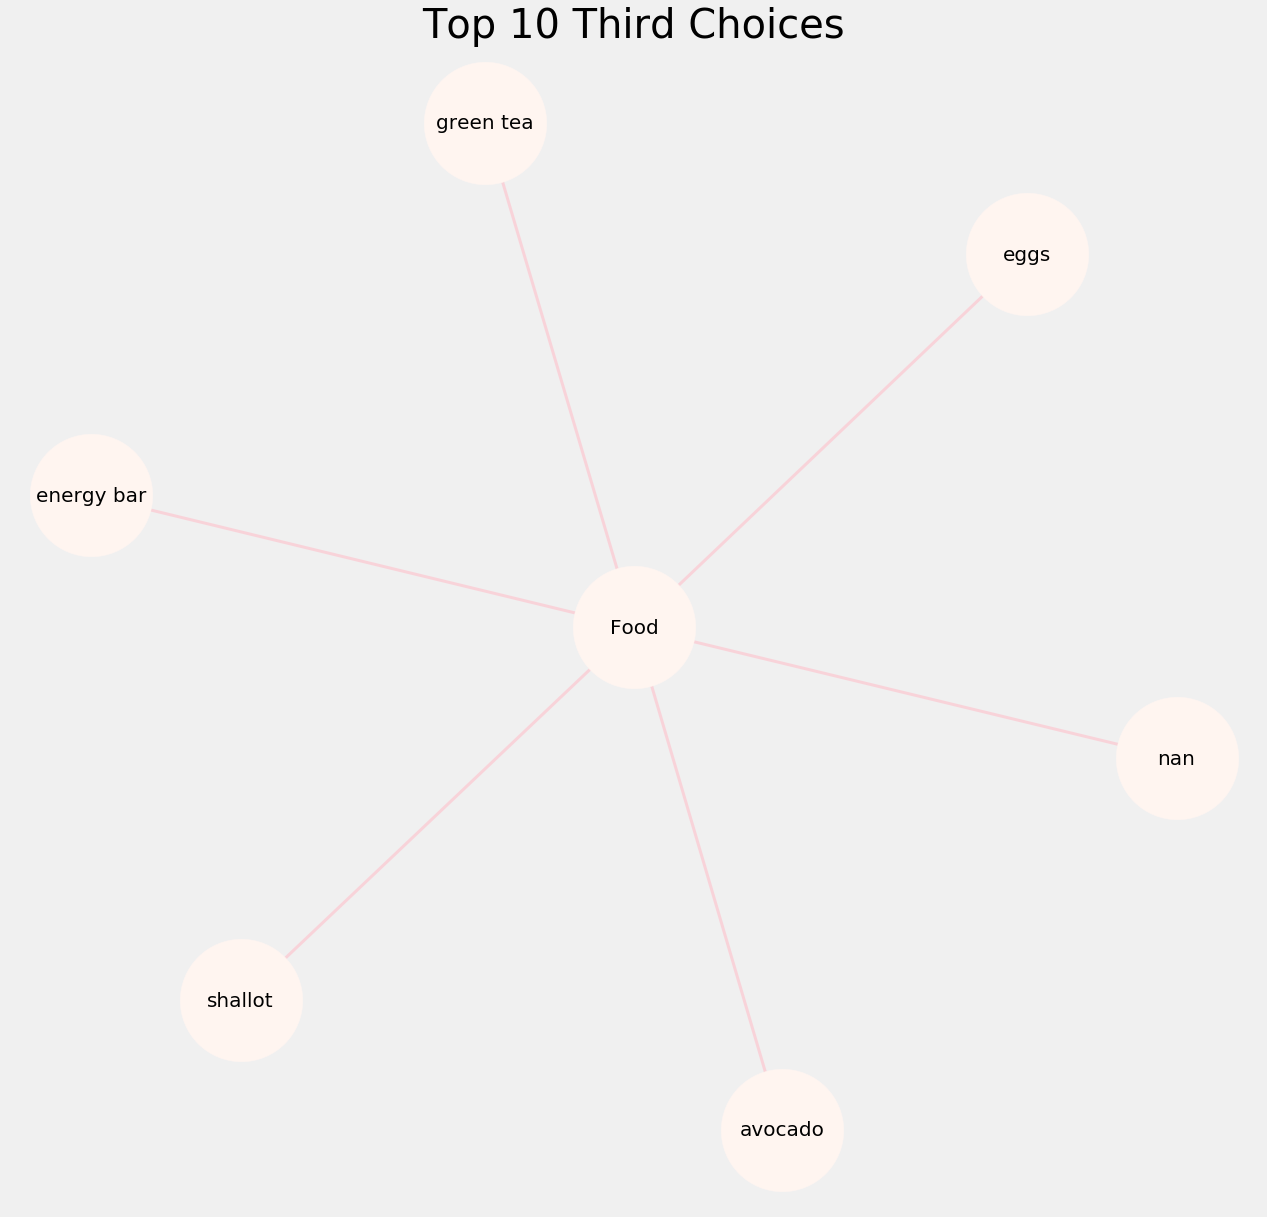

In [32]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Reds(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'pink')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 10 Third Choices', fontsize = 40)
plt.show()

In [33]:
# 데이터 전처리
# 각 고객 쇼핑 항목을 동일한 목록으로 만들기
trans = []
for i in range(0, 7501):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

# numpy배열로 변환
trans = np.array(trans)

# 배열 모양 확인
print(trans.shape)

(7501, 20)


In [43]:
# 트랜젝션 인코더 사용
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

# getting the shape of the data
data.shape

ModuleNotFoundError: No module named 'mlxtend'

In [44]:
import warnings
warnings.filterwarnings('ignore')

# getting correlations for 121 items would be messy 
# so let's reduce the items from 121 to 50

data = data.loc[:, ['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables', 'spaghetti',
                    'shrimp', 'grated cheese', 'eggs', 'cookies', 'french fries', 'herb & pepper', 'ground beef',
                    'tomatoes', 'milk', 'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
                    'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar', 'olive oil', 'champagne', 
                    'avocado', 'pepper', 'butter', 'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 
                    'chicken', 'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie', 'yogurt cake']]

# checking the shape
data.shape

KeyError: "None of [Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',\n       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',\n       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',\n       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',\n       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',\n       'olive oil', 'champagne', 'avocado', 'pepper', 'butter',\n       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',\n       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',\n       'yogurt cake'],\n      dtype='object')] are in the [columns]"